In [1]:
# Importing the data set by using pandas 
import pandas as pd 
df=pd.read_csv('B:\\adult_with_headers.csv')
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [2]:
# It will describe the mean,min,max for numerical values 
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [3]:
# These will find out use any null values in the dataset 
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [4]:
# columns are represented in integer and object values 
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

In [5]:
# Standardization will be done to numerical values from -3 to +3
from sklearn.preprocessing import StandardScaler
numerical_features=df.select_dtypes(include=['number'])
scaler=StandardScaler()
SS=pd.DataFrame(scaler.fit_transform(numerical_features),columns=numerical_features.columns)

In [6]:
SS.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,0.030671,-1.063611,1.134739,0.148453,-0.21666,-0.035429
1,0.837109,-1.008707,1.134739,-0.145920,-0.21666,-2.222153
2,-0.042642,0.245079,-0.420060,-0.145920,-0.21666,-0.035429
3,1.057047,0.425801,-1.197459,-0.145920,-0.21666,-0.035429
4,-0.775768,1.408176,1.134739,-0.145920,-0.21666,-0.035429


In [7]:
# The Numerical Data will be processed in a specific range between 0 to 1 
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
SS=pd.DataFrame(scaler.fit_transform(numerical_features),columns=numerical_features.columns)

In [8]:
SS.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,0.301370,0.044302,0.800000,0.02174,0.0,0.397959
1,0.452055,0.048238,0.800000,0.00000,0.0,0.122449
2,0.287671,0.138113,0.533333,0.00000,0.0,0.397959
3,0.493151,0.151068,0.400000,0.00000,0.0,0.397959
4,0.150685,0.221488,0.800000,0.00000,0.0,0.397959


In [9]:
# Applying  Label Encoding for features with more than 5 categories
from sklearn.preprocessing import LabelEncoder 
for column in df.select_dtypes(include=['object']):
  if len(df[column].unique()) >= 5:
    encoder = LabelEncoder()
    df[column] = encoder.fit_transform(df[column])

print(df.head()) 

   age  workclass  fnlwgt  education  education_num  marital_status  \
0   39          7   77516          9             13               4   
1   50          6   83311          9             13               2   
2   38          4  215646         11              9               0   
3   53          4  234721          1              7               2   
4   28          4  338409          9             13               2   

   occupation  relationship  race      sex  capital_gain  capital_loss  \
0           1             1     4     Male          2174             0   
1           4             0     4     Male             0             0   
2           6             1     4     Male             0             0   
3           6             0     2     Male             0             0   
4          10             5     2   Female             0             0   

   hours_per_week  native_country  income  
0              40              39   <=50K  
1              13              39   <=50

In [10]:
# categorical columns with less than 5 unique categories
categorical_cols = df.select_dtypes(include=['object']).columns
low_cardinality_cols = [col for col in categorical_cols if df[col].nunique() < 5]

# Apply one-hot encoding to these columns
df_encoded = pd.get_dummies(df, columns=low_cardinality_cols)

df_encoded

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,sex_ Female,sex_ Male,income_ <=50K,income_ >50K
0,39,7,77516,9,13,4,1,1,4,2174,0,40,39,False,True,True,False
1,50,6,83311,9,13,2,4,0,4,0,0,13,39,False,True,True,False
2,38,4,215646,11,9,0,6,1,4,0,0,40,39,False,True,True,False
3,53,4,234721,1,7,2,6,0,2,0,0,40,39,False,True,True,False
4,28,4,338409,9,13,2,10,5,2,0,0,40,5,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,4,257302,7,12,2,13,5,4,0,0,38,39,True,False,True,False
32557,40,4,154374,11,9,2,7,0,4,0,0,40,39,False,True,False,True
32558,58,4,151910,11,9,6,1,4,4,0,0,40,39,True,False,True,False
32559,22,4,201490,11,9,4,1,3,4,0,0,20,39,False,True,True,False


In [11]:
import numpy as np

#  Education to Age Ratio (Learning Efficiency)
df['education_age_ratio'] = df['education_num'] / df['age']

#  Work Experience Estimate
df['estimated_experience'] = df['age'] - (df['education_num'] + 6)
df['estimated_experience'] = df['estimated_experience'].clip(lower=0)  # No negative experience

# Capital Total (combining gain and loss)
df['total_capital_impact'] = df['capital_gain'] - df['capital_loss']

# Show summary statistics of new features
print("Summary of new features:")
print("Education-Age Ratio Statistics:")
print(df['education_age_ratio'].describe())

print("Estimated Work Experience Statistics:")
print(df['estimated_experience'].describe())

print("Total Capital Impact Statistics:")
print(df['total_capital_impact'].describe())

Summary of new features:
Education-Age Ratio Statistics:
count    32561.000000
mean         0.294056
std          0.118543
min          0.013333
25%          0.205882
50%          0.281250
75%          0.375000
max          0.777778
Name: education_age_ratio, dtype: float64
Estimated Work Experience Statistics:
count    32561.000000
mean        22.501029
std         13.788173
min          0.000000
25%         11.000000
50%         21.000000
75%         31.000000
max         82.000000
Name: estimated_experience, dtype: float64
Total Capital Impact Statistics:
count    32561.000000
mean       990.345014
std       7408.986951
min      -4356.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: total_capital_impact, dtype: float64


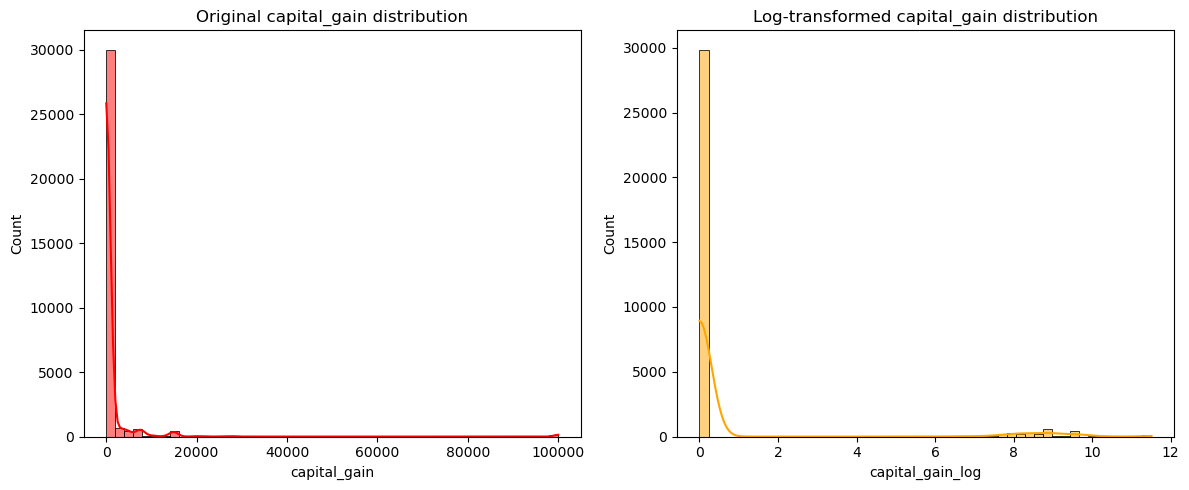

   capital_gain  capital_gain_log
0          2174          7.684784
1             0          0.000000
2             0          0.000000
3             0          0.000000
4             0          0.000000


In [12]:
# The most skewed feature is 'capital_gain' (skewness ~12), so we'll apply a log transformation to it.
import matplotlib.pyplot as plt
import seaborn as sns

# Apply log1p transformation to handle zeros

df['capital_gain_log'] = np.log1p(df['capital_gain'])

# Show before and after distributions
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['capital_gain'], bins=50, kde=True,color='red')
plt.title('Original capital_gain distribution')
plt.subplot(1,2,2)
sns.histplot(df['capital_gain_log'], bins=50, kde=True, color='orange')
plt.title('Log-transformed capital_gain distribution')
plt.tight_layout()
plt.show()

# Show a sample of the transformed values
print(df[['capital_gain', 'capital_gain_log']].head())

In [13]:
# Use the Isolation Forest algorithm to identify and remove outliers. Discuss how outliers can affect model performance.

from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

# Assuming 'df' is your DataFrame with features and you have already performed preprocessing steps

# Select numerical features for outlier detection
numerical_features = df.select_dtypes(include=['number'])

# Scale the features using StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_features)

# Create an IsolationForest model
model = IsolationForest(contamination='auto', random_state=42)

# Fit the model to the scaled data
model.fit(scaled_data)

# Predict outlier scores (negative scores indicate outliers)
outlier_scores = model.decision_function(scaled_data)

# Identify outliers based on a threshold (e.g., scores below -0.5)
outliers = outlier_scores < -0.5

# Remove outliers from the DataFrame
df_no_outliers = df[~outliers]

print(df_no_outliers.head())

   age  workclass  fnlwgt  education  education_num  marital_status  \
0   39          7   77516          9             13               4   
1   50          6   83311          9             13               2   
2   38          4  215646         11              9               0   
3   53          4  234721          1              7               2   
4   28          4  338409          9             13               2   

   occupation  relationship  race      sex  capital_gain  capital_loss  \
0           1             1     4     Male          2174             0   
1           4             0     4     Male             0             0   
2           6             1     4     Male             0             0   
3           6             0     2     Male             0             0   
4          10             5     2   Female             0             0   

   hours_per_week  native_country  income  education_age_ratio  \
0              40              39   <=50K             0.333333

In [14]:
pip install ppscore

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement ppscore (from versions: none)
ERROR: No matching distribution found for ppscore


In [15]:
# prompt: Apply the PPS (Predictive Power Score) to find and discuss the relationships between features. Compare its findings with the correlation matrix

import numpy as np
import ppscore as pps

# Assuming 'df' is your DataFrame with features after preprocessing

# Calculate the PPS matrix
matrix_df = pps.matrix(df)

# Display the PPS matrix
print(matrix_df)

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Display the correlation matrix
correlation_matrix

ModuleNotFoundError: No module named 'ppscore'